# Function

In [655]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plotCM(y_test, y_pred, labels, size=(5,5)):

    confusion_matrix = metrics.confusion_matrix(y_pred, y_test) # invert exis from test, pred to pred test
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = labels,)
    fig, ax = plt.subplots(figsize=size)
    cm_display.plot(ax=ax, xticks_rotation='vertical')
    plt.grid(False)
    # invert exis x,y
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [656]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, labels) :
    print(classification_report(y_true, y_pred, target_names=labels))


In [657]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plotBarChart(courses, y_train):
    values = np.unique(y_train, return_counts=True)[1]
    data = {'class' : courses, 'value' : values}
    data = pd.DataFrame(data, index=courses)
    print(data)
    
    ax = data.plot(kind='bar', figsize=(3,3), color='maroon', legend=False, rot=0)
    ax.set_xlabel("Class")
    ax.set_ylabel("Number of sample data")
    ax.grid(True, zorder=0)
    ax.set_axisbelow(True)

    plt.show()

# โหลดชุดข้อมูล

In [658]:
import helpers
X, y = helpers.get_data()

In [659]:
classes = ['lived', 'died', 'euthanized']

# Feature selection for classification

## Numerical feature 

Use LDA

In [660]:
feature_num = ['temperature', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']
X_num_feature = X[feature_num].copy()

In [661]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_num_select = lda.fit_transform(X_num_feature, y)

In [662]:
print('Original numerical feature number:', X_num_feature.shape[1])
print('Reduced numerical feature number:', X_num_select.shape[1])

Original numerical feature number: 6
Reduced numerical feature number: 2


## Nominal feature

Use Chi square

In [663]:
feature_nom = [i for i in np.array(X.columns) if i not in np.array(feature_num)]
X_nom_feature = X[feature_nom].copy()

In [664]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=12)
X_nom_select = chi2_features.fit_transform(X_nom_feature, y)

In [665]:
chi2_features.get_feature_names_out()

array(['age', 'temp_of_extremities', 'pain', 'peristalsis',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance',
       'surgical_lesion', 'lesion_site', 'lesion_type', 'lesion_subtype',
       'lesion_code'], dtype=object)

In [666]:
print('Original nominal feature number:', X_nom_feature.shape[1])
print('Reduced nominal feature number:', X_nom_select.shape[1])

Original nominal feature number: 20
Reduced nominal feature number: 12


In [667]:
X_num_select.shape, X_nom_select.shape

((299, 2), (299, 12))

รวม Numerical feature และ nominal feature ที่ได้ทำการ feature selection แล้ว

In [668]:
X_select = np.concatenate([X_num_select, X_nom_select], axis=1)

In [669]:
X_select.shape

(299, 14)

# แยกข้อมูลฝึก/ทดสอบ

In [670]:
# split data
from sklearn.model_selection import train_test_split
# X_select || X
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2)

# ตัวแปรควบคุม

In [671]:
from matplotlib import pyplot as plt

In [672]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
cv = 10

In [673]:
ls_model = {
    'model_cv' : []
}

In [674]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

def bulidAndTrainModel(X_train, y_train) :
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=30)
    clf = dtree.fit(X_train, y_train)    
    print(clf.get_params)

    return clf

# การทดลองที่ 1

สร้างโมเดล Decision Tree เรียนรู้ชุดข้อมูลฝึกที่ยังไม่ได้ sampling

                 class  value
lived            lived     62
died              died     35
euthanized  euthanized    142


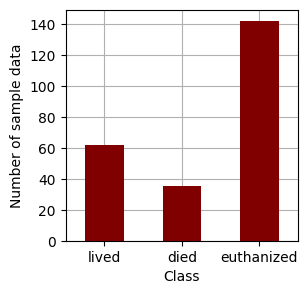

In [675]:
plotBarChart(classes, y_train)

In [676]:

model_1 = bulidAndTrainModel(X_train, y_train)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=30)>


[Text(0.5525968309859155, 0.9545454545454546, 'x[12] <= 0.5\nentropy = 1.357\nsamples = 239\nvalue = [62, 35, 142]'),
 Text(0.2671654929577465, 0.8636363636363636, 'x[1] <= -0.885\nentropy = 1.548\nsamples = 105\nvalue = [46, 27, 32]'),
 Text(0.056338028169014086, 0.7727272727272727, 'x[9] <= 0.5\nentropy = 1.143\nsamples = 22\nvalue = [1, 14, 7]'),
 Text(0.028169014084507043, 0.6818181818181818, 'x[5] <= 0.5\nentropy = 0.544\nsamples = 8\nvalue = [1, 7, 0]'),
 Text(0.014084507042253521, 0.5909090909090909, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.04225352112676056, 0.5909090909090909, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.08450704225352113, 0.6818181818181818, 'x[0] <= 1.52\nentropy = 1.0\nsamples = 14\nvalue = [0, 7, 7]'),
 Text(0.07042253521126761, 0.5909090909090909, 'x[1] <= -2.459\nentropy = 0.98\nsamples = 12\nvalue = [0, 7, 5]'),
 Text(0.056338028169014086, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.08450704225352113, 0.5

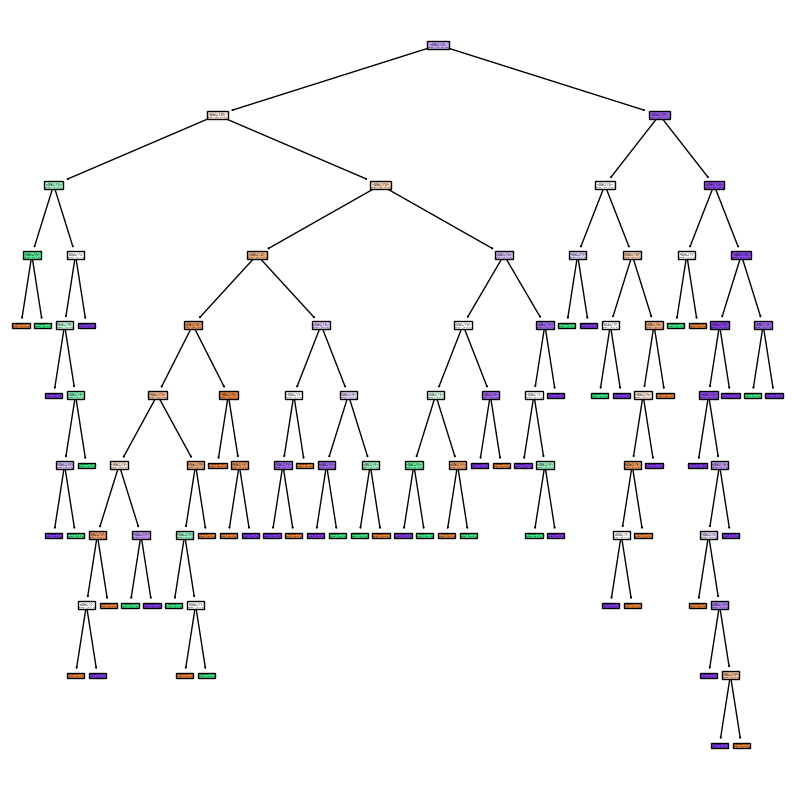

In [677]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model_1, filled=True)

In [678]:
y_pred_1 = model_1.predict(X_test)
report(y_pred_1, y_test, classes)

              precision    recall  f1-score   support

       lived       0.60      0.69      0.64        13
        died       0.22      0.33      0.27         6
  euthanized       0.86      0.76      0.81        41

    accuracy                           0.70        60
   macro avg       0.56      0.59      0.57        60
weighted avg       0.74      0.70      0.72        60



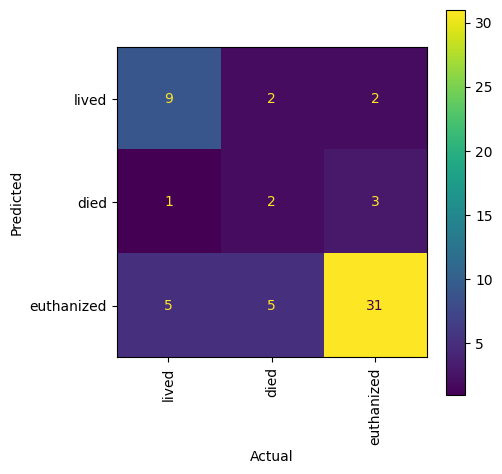

In [679]:
plotCM(y_test=y_test, y_pred=y_pred_1, labels=classes)

# การทดลองเพื่อแก้ปัญหา Imblance dataset

## Random sampling

In [680]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res_random,y_res_random = ros.fit_resample(X_train,y_train)

                 class  value
lived            lived    142
died              died    142
euthanized  euthanized    142


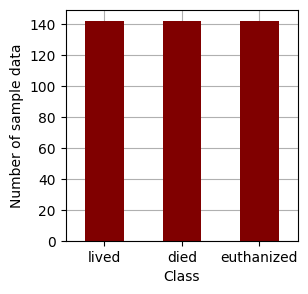

In [681]:
plotBarChart(classes, y_res_random)

In [682]:
model_randoms = bulidAndTrainModel(X_res_random, y_res_random)


<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=30)>


In [683]:
y_pred_res_rand = model_randoms.predict(X_test)
report(y_test, y_pred_res_rand, classes)

              precision    recall  f1-score   support

       lived       0.50      0.67      0.57        15
        died       0.43      0.33      0.38         9
  euthanized       0.82      0.75      0.78        36

    accuracy                           0.67        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.68      0.67      0.67        60



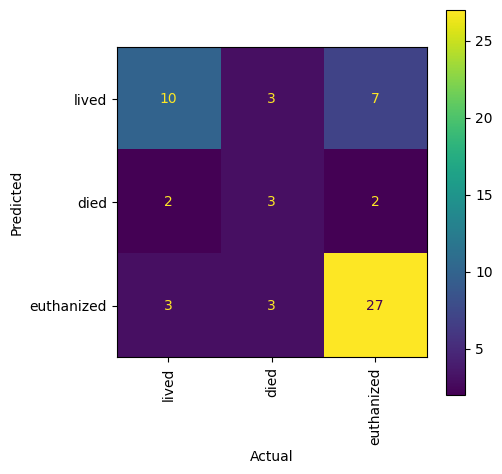

In [684]:
plotCM(y_test=y_test, y_pred=y_pred_res_rand, labels=classes)

## use oversampling using SMOTE to increase data for training set 

In [685]:
from imblearn .over_sampling import SMOTE

sm = SMOTE()
X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train,y_train)

                 class  value
lived            lived    142
died              died    142
euthanized  euthanized    142


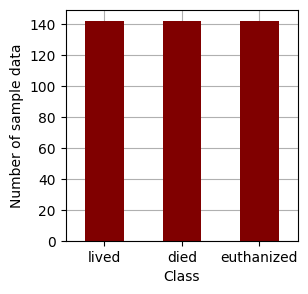

In [686]:
plotBarChart(classes, y_resampled_smote)

In [687]:
model_smote = bulidAndTrainModel(X_resampled_smote, y_resampled_smote)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=30)>


In [688]:
y_pred_smote = model_smote.predict(X_test)
report(y_pred_smote, y_test, classes)

              precision    recall  f1-score   support

       lived       0.60      0.56      0.58        16
        died       0.22      0.40      0.29         5
  euthanized       0.86      0.79      0.83        39

    accuracy                           0.70        60
   macro avg       0.56      0.59      0.56        60
weighted avg       0.74      0.70      0.72        60



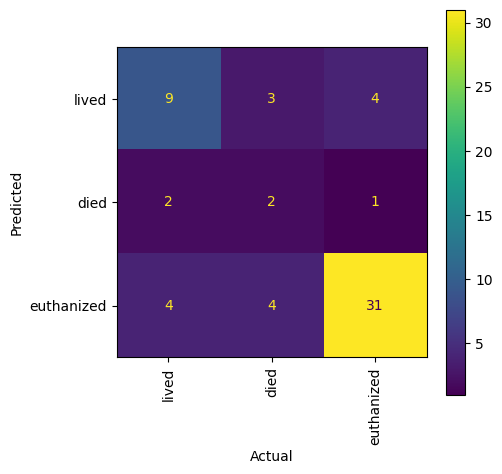

In [689]:
plotCM(y_test=y_test, y_pred=y_pred_smote, labels=classes)

## Tomek

In [690]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [691]:
tl = TomekLinks()
X_res_tomek, y_res_tomek = tl.fit_resample(X_train, y_train)

                 class  value
lived            lived     47
died              died     35
euthanized  euthanized    132


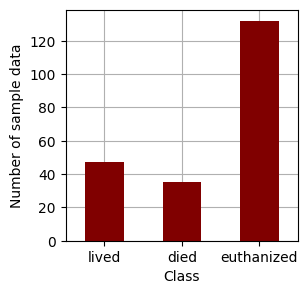

In [692]:
plotBarChart(classes, y_res_tomek)

In [693]:
model_tomek = bulidAndTrainModel(X_res_tomek, y_res_tomek)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=30)>


In [694]:
y_pred_tomek = model_tomek.predict(X_test)
report(y_test, y_pred_tomek, classes)

              precision    recall  f1-score   support

       lived       0.56      0.60      0.58        15
        died       0.43      0.33      0.38         9
  euthanized       0.84      0.86      0.85        36

    accuracy                           0.72        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.71      0.72      0.71        60



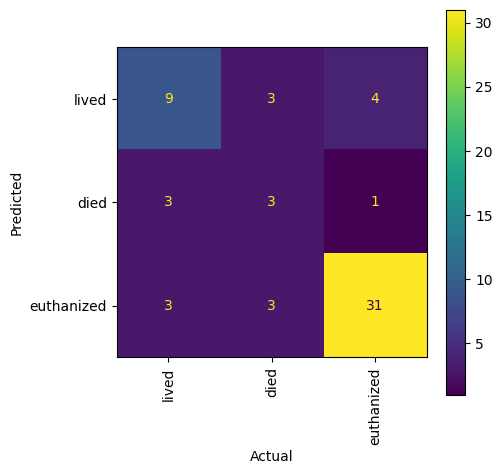

In [695]:
plotCM(y_test, y_pred_tomek, classes)

## ADASYN

In [696]:
from imblearn.over_sampling import ADASYN

In [697]:
ad = ADASYN()
X_res_adasyn, y_res_adasyn = ad.fit_resample(X_train, y_train)

                 class  value
lived            lived    124
died              died    143
euthanized  euthanized    142


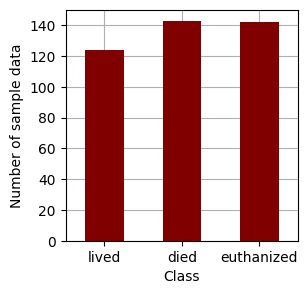

In [698]:
plotBarChart(classes, y_res_adasyn)

In [699]:
model_adasyn = bulidAndTrainModel(X_res_adasyn, y_res_adasyn)

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_depth=30)>


In [700]:
y_pred_adasyn = model_adasyn.predict(X_test)
report(y_test, y_pred_adasyn, classes)

              precision    recall  f1-score   support

       lived       0.62      0.67      0.65        15
        died       0.38      0.33      0.35         9
  euthanized       0.81      0.81      0.81        36

    accuracy                           0.70        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.70      0.70      0.70        60



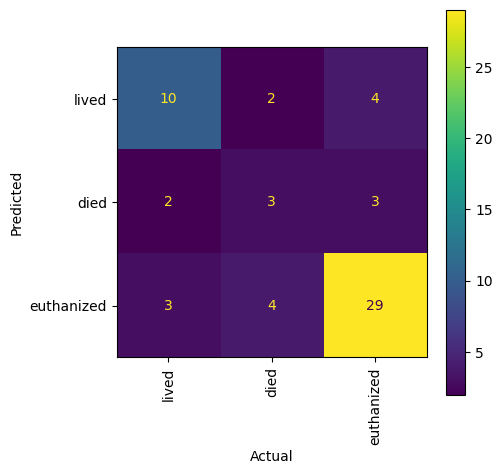

In [701]:
plotCM(y_test, y_pred_adasyn, classes)

# สรุปผลการทดลอง

In [702]:
index = ['On sampling', 'Random', 'SMOT', 'TOMEK', 'ADASYN']

ls_reslut_pred = [
    y_pred_1,
    y_pred_res_rand,
    y_pred_smote,
    y_pred_tomek,
    y_pred_adasyn ,
]

In [703]:
from sklearn import metrics

# accuarcy
accuarcy = []
for pred in ls_reslut_pred :
    accuarcy.append(metrics.accuracy_score(y_test, pred))
    
# recall
recall = []
for pred in ls_reslut_pred :
    recall.append(metrics.recall_score(y_test, pred, average='weighted'))

# F1
f1 = []
for pred in ls_reslut_pred :
    f1.append(metrics.f1_score(y_test, pred, average='weighted'))
    
# precision
precision = []
for pred in ls_reslut_pred :
    precision.append(metrics.precision_score(y_test, pred, average='weighted'))

เปรียบเทียบประสิทธิภาพโมเดลที่เรียนรู้กับชุดข้อมูลที่มีการ sampling ต่างกัน

In [704]:
data_scores = pd.DataFrame(
    data={
    'accuarcy' : accuarcy,
    'recall' : recall,
    'F1' : f1,
    'precision' : precision
    }, index=index)

data_scores

,accuarcy,recall,F1,precision
On sampling,0.700000,0.700000,0.683831,0.676735
Random,0.666667,0.666667,0.668672,0.680195
SMOT,0.700000,0.700000,0.684018,0.677548
TOMEK,0.716667,0.716667,0.711000,0.707613
ADASYN,0.700000,0.700000,0.697565,0.695833


<bound method Axes.plot of <AxesSubplot: title={'center': 'Compare the performance of all models.'}>>

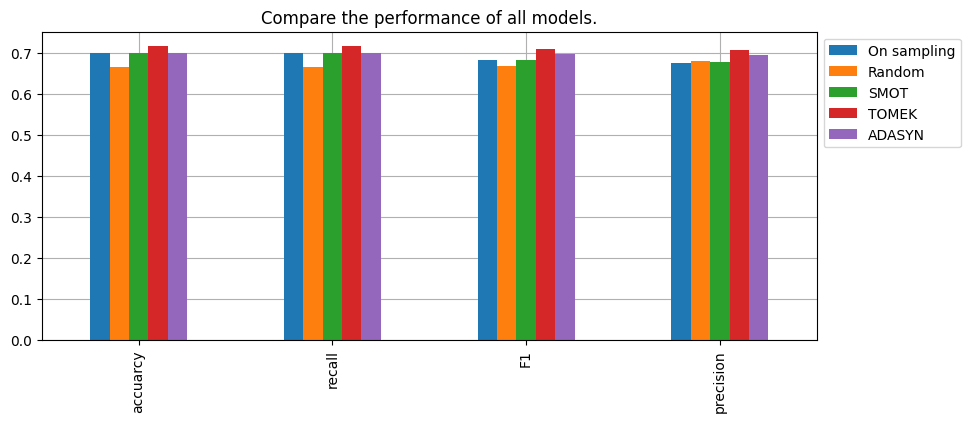

In [705]:
# performance บน test set
ax = data_scores.T.plot(kind='bar', figsize=(10,4))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Compare the performance of all models.')
ax.grid(True, zorder=0)
ax.set_axisbelow(True)
ax.plot